Linear Discriminant Analysis (LDA)

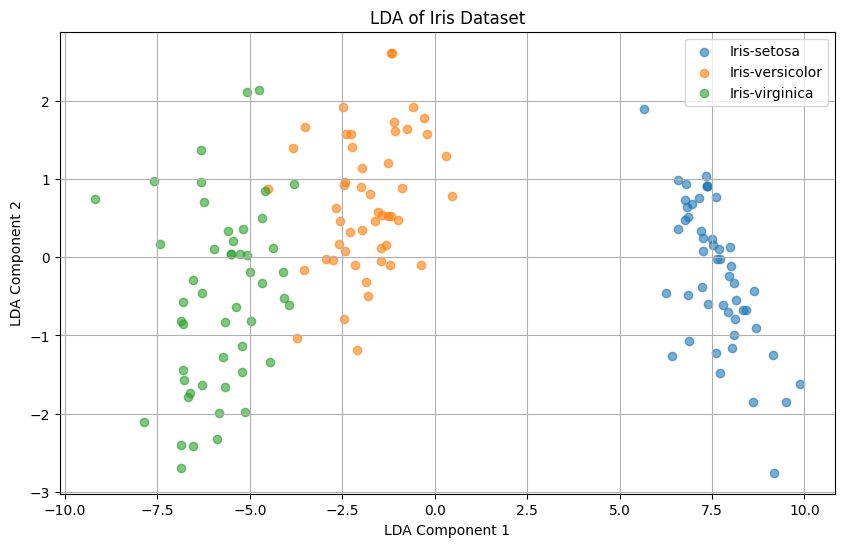

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

iris_data = pd.read_csv(url, names=column_names)

X = iris_data.drop('species', axis=1)
y = iris_data['species']

#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Apply LDA with 2 components
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Step 6: Visualize LDA results in 2D
plt.figure(figsize=(10, 6))
for target in set(y):
    plt.scatter(X_lda[y == target, 0], X_lda[y == target, 1],
                label=target, alpha=0.6)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA of Iris Dataset')
plt.legend()
plt.grid()
plt.show()

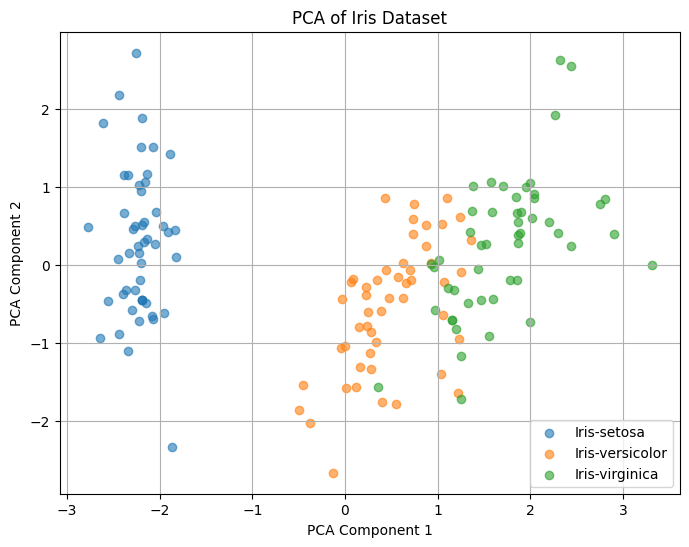

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA results
plt.figure(figsize=(8, 6))
for target in set(y):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], label=target, alpha=0.6)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid()
plt.show()

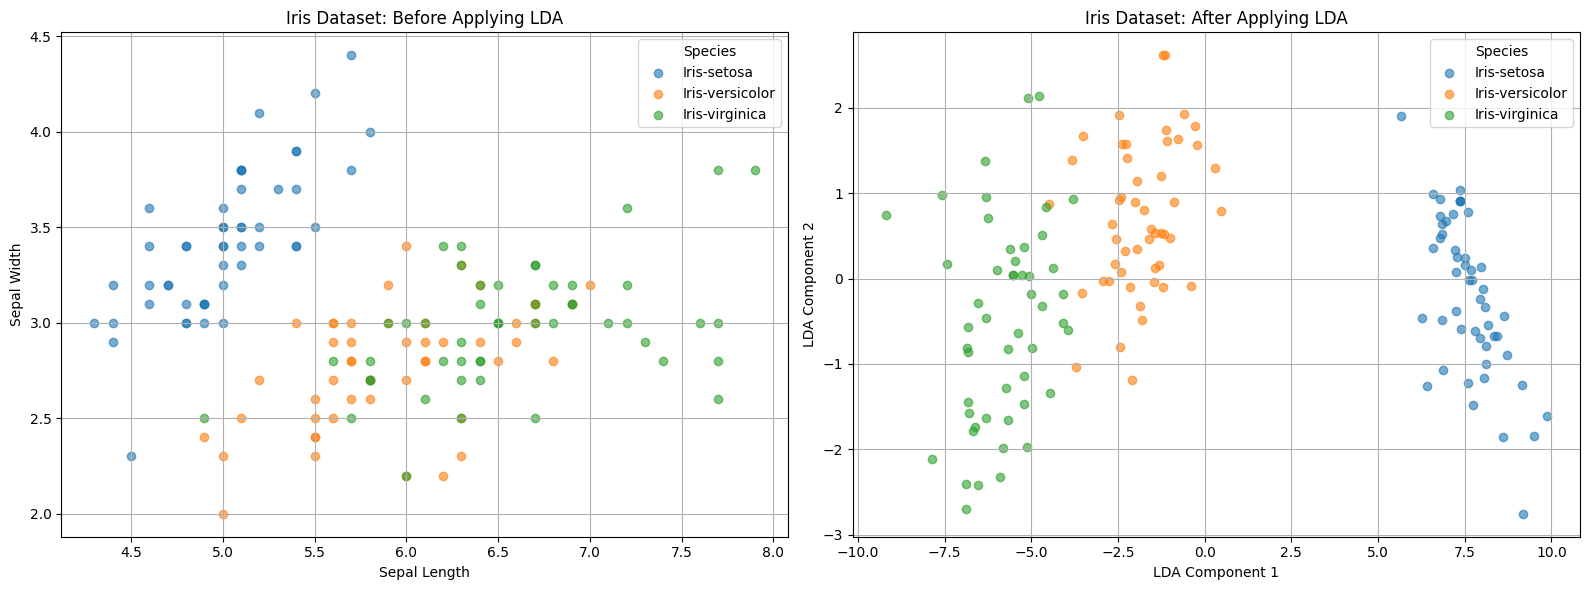

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

# Load Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_data = pd.read_csv(url, names=column_names)

# Separate features and target
X = iris_data.drop('species', axis=1)
y = iris_data['species']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LDA with 2 components
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y_encoded)

# Plot 1: Visualize dataset before LDA (first two features)
plt.figure(figsize=(16, 6))

# Before LDA
plt.subplot(1, 2, 1)
for species in iris_data['species'].unique():
    subset = iris_data[iris_data['species'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=species, alpha=0.6)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset: Before Applying LDA')
plt.legend(title="Species")
plt.grid()

# After LDA
plt.subplot(1, 2, 2)
for i, species in enumerate(label_encoder.classes_):
    plt.scatter(X_lda[y_encoded == i, 0], X_lda[y_encoded == i, 1], label=species, alpha=0.6)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('Iris Dataset: After Applying LDA')
plt.legend(title="Species")
plt.grid()

plt.tight_layout()
plt.show()
